# *Predicting Heart Disease Using Machine Learning*

*1. Importing Libraries*

In [1]:
import pandas as pd
import seaborn as sns
import joblib
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

*2. Importing Dataset*

In [2]:
df = pd.read_csv('./dataset/dummy_data.csv')

In [3]:
n = len(df)
cnt = 0
fl = False

# for i in range(0, n):
#     if df.loc[i]['ldl_chol']>100:
#         cnt += 1
#     if df.loc[i]['hdl_chol']>60:
#         cnt += 1
#     if df.loc[i]['chol']>200:
#         cnt += 1
#     if df.loc[i]['tgl']>150:
#         fl = True
#         cnt += 1
#     if cnt==4:
#         df.loc[i]['target'] = "a"
#     elif (fl==True and cnt>=3):
#         df.loc[i]['target'] = "a"

In [4]:
# df.to_csv('file1.csv')
df.head(20)

,chol,tgl,hdl_chol,vldl_chol,chol_hdl_ratio,ldl_chol,age,sex,target
0,143.00,53.00,69.00,10.600,2.070,84.600,23,1,0
1,100.00,81.00,53.00,16.200,1.890,63.200,26,0,0
2,132.00,66.00,76.00,13.200,1.740,69.200,43,1,0
3,95.00,52.00,46.00,10.400,2.070,59.400,35,0,0
4,109.00,87.00,52.00,17.400,2.100,74.400,75,1,0
5,162.00,149.00,43.00,29.800,3.770,148.800,53,0,0
6,120.00,244.00,31.00,48.800,3.870,137.800,44,1,0
7,199.00,176.00,35.00,35.200,5.690,199.200,43,1,0
8,96.00,54.00,40.00,10.800,2.400,66.800,30,1,0
9,237.60,201.30,45.00,40.300,5.300,152.300,57,1,1


*3. Taking Care of Missing Values*

In [5]:
df.isnull().sum()

chol              0
tgl               0
hdl_chol          0
vldl_chol         0
chol_hdl_ratio    0
ldl_chol          0
age               0
sex               0
target            0
dtype: int64

*4. Taking Care of Duplicate Values*

In [6]:
data_dup = df.duplicated().any()

In [7]:
data_dup

False

*5. Data Processing*

In [8]:
cate_val = []
cont_val = []
for column in df.columns:
    if df[column].nunique() <=10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [9]:
cate_val

['sex', 'target']

In [10]:
cont_val

['chol', 'tgl', 'hdl_chol', 'vldl_chol', 'chol_hdl_ratio', 'ldl_chol', 'age']

*6. Encoding Categorical Data*

In [11]:
cate_val

['sex', 'target']

In [12]:
cate_val.remove('sex')
cate_val.remove('target')
df = pd.get_dummies(df,columns = cate_val,drop_first=True)

In [13]:
df.head(10)

,chol,tgl,hdl_chol,vldl_chol,chol_hdl_ratio,ldl_chol,age,sex,target
0,143.0,53.0,69.0,10.6,2.07,84.6,23,1,0
1,100.0,81.0,53.0,16.2,1.89,63.2,26,0,0
2,132.0,66.0,76.0,13.2,1.74,69.2,43,1,0
3,95.0,52.0,46.0,10.4,2.07,59.4,35,0,0
4,109.0,87.0,52.0,17.4,2.10,74.4,75,1,0
5,162.0,149.0,43.0,29.8,3.77,148.8,53,0,0
6,120.0,244.0,31.0,48.8,3.87,137.8,44,1,0
7,199.0,176.0,35.0,35.2,5.69,199.2,43,1,0
8,96.0,54.0,40.0,10.8,2.40,66.8,30,1,0
9,237.6,201.3,45.0,40.3,5.30,152.3,57,1,1


*7. Feature Scaling*

In [14]:
df.head(10)

,chol,tgl,hdl_chol,vldl_chol,chol_hdl_ratio,ldl_chol,age,sex,target
0,143.0,53.0,69.0,10.6,2.07,84.6,23,1,0
1,100.0,81.0,53.0,16.2,1.89,63.2,26,0,0
2,132.0,66.0,76.0,13.2,1.74,69.2,43,1,0
3,95.0,52.0,46.0,10.4,2.07,59.4,35,0,0
4,109.0,87.0,52.0,17.4,2.10,74.4,75,1,0
5,162.0,149.0,43.0,29.8,3.77,148.8,53,0,0
6,120.0,244.0,31.0,48.8,3.87,137.8,44,1,0
7,199.0,176.0,35.0,35.2,5.69,199.2,43,1,0
8,96.0,54.0,40.0,10.8,2.40,66.8,30,1,0
9,237.6,201.3,45.0,40.3,5.30,152.3,57,1,1


In [15]:
st = StandardScaler()
df[cont_val] = st.fit_transform(df[cont_val])

In [16]:
df.head(10)

,chol,tgl,hdl_chol,vldl_chol,chol_hdl_ratio,ldl_chol,age,sex,target
0,-0.670061,-0.915127,1.575462,-0.941713,-1.457820,-0.910769,-2.037283,1,0
1,-1.595136,-0.667986,0.331987,-0.681588,-1.610054,-1.258024,-1.832178,0,0
2,-0.906708,-0.800383,2.119482,-0.820941,-1.736915,-1.160663,-0.669919,1,0
3,-1.702702,-0.923954,-0.212033,-0.951003,-1.457820,-1.319686,-1.216865,0,0
4,-1.401515,-0.615027,0.254270,-0.625847,-1.432448,-1.076283,1.517862,1,0
5,-0.261307,-0.067786,-0.445185,-0.049857,-0.020055,0.130996,0.013762,0,0
6,-1.164868,0.770729,-1.377791,0.832708,0.064519,-0.047500,-0.601551,1,0
7,0.534687,0.170529,-1.066922,0.200977,1.603773,0.948830,-0.669919,1,0
8,-1.681189,-0.906301,-0.678336,-0.932423,-1.178725,-1.199607,-1.558706,1,0
9,1.365103,0.393838,-0.289750,0.437876,1.273933,0.187790,0.287235,1,1


*8. Splitting The Dataset Into Training And Test Set*

In [17]:
X = df.drop('target', axis=1)

In [18]:
y = df['target']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
y_test

288    0
9      1
57     0
60     0
25     0
      ..
198    0
195    0
210    0
224    1
158    0
Name: target, Length: 62, dtype: int64

*9. Logistic Regression*

In [21]:
df.head(10)

,chol,tgl,hdl_chol,vldl_chol,chol_hdl_ratio,ldl_chol,age,sex,target
0,-0.670061,-0.915127,1.575462,-0.941713,-1.457820,-0.910769,-2.037283,1,0
1,-1.595136,-0.667986,0.331987,-0.681588,-1.610054,-1.258024,-1.832178,0,0
2,-0.906708,-0.800383,2.119482,-0.820941,-1.736915,-1.160663,-0.669919,1,0
3,-1.702702,-0.923954,-0.212033,-0.951003,-1.457820,-1.319686,-1.216865,0,0
4,-1.401515,-0.615027,0.254270,-0.625847,-1.432448,-1.076283,1.517862,1,0
5,-0.261307,-0.067786,-0.445185,-0.049857,-0.020055,0.130996,0.013762,0,0
6,-1.164868,0.770729,-1.377791,0.832708,0.064519,-0.047500,-0.601551,1,0
7,0.534687,0.170529,-1.066922,0.200977,1.603773,0.948830,-0.669919,1,0
8,-1.681189,-0.906301,-0.678336,-0.932423,-1.178725,-1.199607,-1.558706,1,0
9,1.365103,0.393838,-0.289750,0.437876,1.273933,0.187790,0.287235,1,1


In [159]:
log = LogisticRegression()
log.fit(X_train.values, y_train)

C:\Users\Vedan\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [160]:
y_pred1 = log.predict(X_test.values)
y_pred_prob = log.predict_proba(X_test.values)

# Extract the probabilities of the positive class (1)
y_pred_prob_pos = y_pred_prob[:, 1]

# Convert probabilities to percentages
y_pred_percent = y_pred_prob_pos * 100

# Calculate accuracy score
acc_score = accuracy_score(y_test, y_pred1)

*10. Support Vector Classifier*

In [161]:
svm = svm.SVC()

AttributeError: 'SVC' object has no attribute 'SVC'

In [162]:
svm.fit(X_train,y_train)

SVC()

In [163]:
y_pred2 = svm.predict(X_test)

In [164]:
accuracy_score(y_test,y_pred2)

0.9516129032258065

*11. K-Nearest Neighbor(KNN)*

In [165]:
knn = KNeighborsClassifier()

In [166]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [167]:
y_pred3=knn.predict(X_test)

In [168]:
accuracy_score(y_test,y_pred3)

0.9516129032258065

In [169]:
score = []

for k in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    score.append(accuracy_score(y_test,y_pred))

In [170]:
score

[0.9516129032258065,
 0.9516129032258065,
 0.9516129032258065,
 0.9516129032258065,
 0.9516129032258065,
 0.9516129032258065,
 0.9516129032258065,
 0.9516129032258065,
 0.9516129032258065,
 0.9516129032258065,
 0.9516129032258065,
 0.9516129032258065,
 0.9516129032258065,
 0.9516129032258065,
 0.9516129032258065,
 0.9516129032258065,
 0.9516129032258065,
 0.9516129032258065,
 0.9516129032258065,
 0.9516129032258065,
 0.9516129032258065,
 0.9516129032258065,
 0.9516129032258065,
 0.9516129032258065,
 0.9516129032258065,
 0.9516129032258065,
 0.9516129032258065,
 0.9516129032258065,
 0.9516129032258065,
 0.9516129032258065,
 0.9516129032258065,
 0.9516129032258065,
 0.9516129032258065,
 0.9516129032258065,
 0.9516129032258065,
 0.9516129032258065,
 0.9516129032258065,
 0.9516129032258065,
 0.9516129032258065]

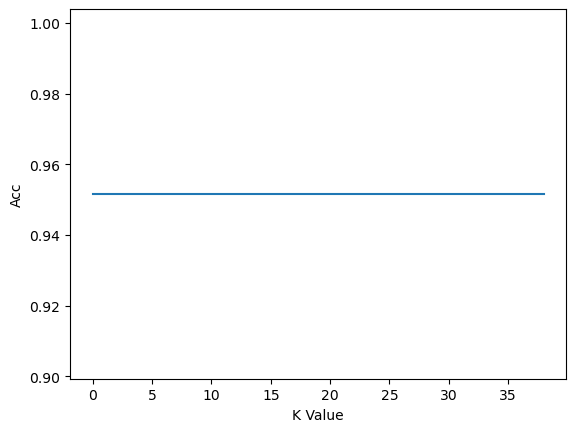

In [171]:
plt.plot(score)
plt.xlabel("K Value")
plt.ylabel("Acc")
plt.show()

In [172]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
accuracy_score(y_test,y_pred)

0.9516129032258065

*Non-Linear Machine Learning Algorithms*

In [173]:
df = pd.read_csv('./dataset/dummy_data.csv')

In [174]:
df = df.drop_duplicates()

In [175]:
X = df.drop('target', axis=1)
y=df['target']

In [176]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

*12. Decision Tree Classifier*

In [177]:
dt = DecisionTreeClassifier()

In [178]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [179]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [180]:
y_pred4= dt.predict(X_test)
accuracy_score(y_test,y_pred4)

0.9516129032258065

*13. Random Forest Classifier*

In [181]:
rf = RandomForestClassifier()

In [182]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [183]:
y_pred5= rf.predict(X_test)

In [184]:
accuracy_score(y_test,y_pred5)

0.9516129032258065

*14. Gradient Boosting Classifier*

In [185]:
gbc = GradientBoostingClassifier()

In [186]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [187]:
y_pred6 = gbc.predict(X_test)

In [188]:
accuracy_score(y_test,y_pred6)

1.0

In [189]:
final_data = pd.DataFrame({'Models':['LR','SVM','KNN','DT','RF','GB'],
                          'ACC':[accuracy_score(y_test,y_pred1)*100,
                                accuracy_score(y_test,y_pred2)*100,
                                accuracy_score(y_test,y_pred3)*100,
                                accuracy_score(y_test,y_pred4)*100,
                                accuracy_score(y_test,y_pred5)*100,
                                accuracy_score(y_test,y_pred6)*100]})

In [190]:
final_data

,Models,ACC
0,LR,91.935484
1,SVM,95.161290
2,KNN,95.161290
3,DT,95.161290
4,RF,95.161290
5,GB,100.000000


<Axes: xlabel='Models', ylabel='ACC'>

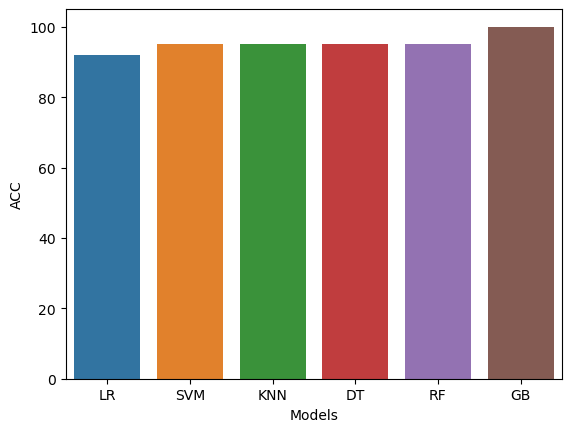

In [191]:
sns.barplot(x='Models', y='ACC', data=final_data)

In [192]:
X=df.drop('target',axis=1)
y=df['target']

In [193]:
dt = DecisionTreeClassifier()
dt.fit(X, y)

DecisionTreeClassifier()

In [194]:
new_data = pd.DataFrame({
     'chol':122.9,
     'tgl':91.32,
    'hdl_chol': 33.7,
       'vldl_chol':18.26,
    'chol_hdl_ratio': 3.65,
    'ldl_chol': 70.95,
    'age': 46,
    'sex': 1,
 
},index=[0])

In [195]:
new_data

,chol,tgl,hdl_chol,vldl_chol,chol_hdl_ratio,ldl_chol,age,sex
0,122.9,91.32,33.7,18.26,3.65,70.95,46,1


In [196]:
df.head(10)

,chol,tgl,hdl_chol,vldl_chol,chol_hdl_ratio,ldl_chol,age,sex,target
0,143.0,53.0,69.0,10.6,2.07,84.6,23,1,0
1,100.0,81.0,53.0,16.2,1.89,63.2,26,0,0
2,132.0,66.0,76.0,13.2,1.74,69.2,43,1,0
3,95.0,52.0,46.0,10.4,2.07,59.4,35,0,0
4,109.0,87.0,52.0,17.4,2.10,74.4,75,1,0
5,162.0,149.0,43.0,29.8,3.77,148.8,53,0,0
6,120.0,244.0,31.0,48.8,3.87,137.8,44,1,0
7,199.0,176.0,35.0,35.2,5.69,199.2,43,1,0
8,96.0,54.0,40.0,10.8,2.40,66.8,30,1,0
9,237.6,201.3,45.0,40.3,5.30,152.3,57,1,1


In [197]:
p = rf.predict(new_data)
if p[0]==0:
    print("No Disease")
else:
    print("Disease")

No Disease


In [198]:
# saved the model
joblib.dump(log, 'model.joblib')

['model.joblib']

In [222]:
import joblib
import numpy as np
# Load the saved model
model = joblib.load('model.joblib')

# Function to make a prediction based on input data
def make_prediction(input_data):
    print("Input data shape:", input_data.shape)
    
    # Reshape the input data to match the expected shape of the model input
    input_data = input_data.reshape(1, -1)
    
    # Make the prediction using the loaded model
    prediction_prob = model.predict_proba(input_data)
    prediction = prediction_prob[:, 1]
    print("Prediction probability:", prediction)
    
    # Convert probability to a percentage
    prediction_percent = prediction
    
    # Return the prediction as a float
    return prediction_percent[0]

make_prediction(np.array([270.6, 219.3, 36.0, 40, 4.3, 73, 67, 1]))

Input data shape: (8,)
Prediction probability: [0.84397554]


0.8439755444419614